In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [2]:
housing = pd.read_csv('./data/housing.csv')

### Modelle reagieren katastrophal auf fehlende Daten

Aufspüren und
* feature droppen
* observation droppen
* Daten ergänzen

### Goldene Regel: Ausprobieren und performance messen :P

In [13]:
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<AxesSubplot:xlabel='median_income', ylabel='Count'>

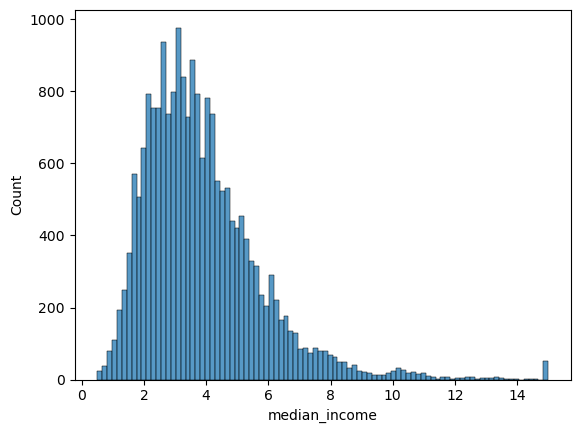

In [28]:
sns.histplot(data=housing, x='median_income')

In [18]:
imputer = SimpleImputer(strategy='mean')  # nulls durch mean ersetzen
imputed_beds = imputer.fit_transform(housing[['total_bedrooms']])
housing.total_bedrooms = imputed_beds

In [20]:
X = housing.drop(columns='median_house_value')
y = housing.median_house_value

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'NEAR OCEAN'

### `ocean_proximity` enthält keine Zahlen

Möglichkeiten:
1. Umwandeln in Ordinales Merkmal => inland < near bay < near ocean ???
2. OneHotEncoding => je Merkmalsausprägung ein feature  
  `drop...` Parameter - droppt ein Feature, weil es sich aus den anderen ergibt. Wenn euer Model beim Training `Singular matrix` schreit, dann inkludiert ihn, sonst lieber nicht; [Komplex](https://inmachineswetrust.com/posts/drop-first-columns/)
3. droppen

In [24]:
housing = pd.get_dummies(data=housing, columns=['ocean_proximity'])
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


In [25]:
X = housing.drop(columns='median_house_value')
y = housing.median_house_value
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [26]:
predictions = lin_reg.predict(X_test)
error = mean_squared_error(y_true=y_test, y_pred=predictions)
np.sqrt(error)

70031.41991955669